
# Project: Investigate a TMDb movie data set.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This data set contains information on over 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. This data set cleaned from the raw data on Kaggle.
In this analysis we explore the following questions:
 #### 1. Which genres are most popular? Explore TOP-10 most popular genres
 #### 2. Which directors are most popular? Explore TOP-10 most popular, directors
 #### 3. Which production companies are made the most popular movies? TOP-10 production companies made the most popular movies 
 #### 4. Let's explore how budget and revenue depend on the popularity
##### <p style="margin-left: 40px">    a. Explore the original budget and revenue without taking into account the associated movie inflation over time. </p>
#### <p style="margin-left: 40px">   b. Explore the original budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. </p>
 #### 5. Let's explore whether there is a correlation between popularity and votes?

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [191]:
#Create a pandas data frame from the given fle tmdb-movies.csv
df = pd.read_csv('tmdb-movies.csv')
# And display first two raws of the data frame 
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### Data Cleaning

> The data frame has 21 columns, each of which is a feature of our movie. It also consists of 10866 rows this means the number of movies in the database. As we can see below some of the data is missing, so not all of the movies have all the features filled 

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [193]:
df.shape

(10866, 21)

> Let´s check and delete duplicates if any:

In [194]:
#To check if there are any duplicates
sum(df.duplicated())

1

In [195]:
#We have one duplicate in the data frame. To delete duplicates and save the result at the same data frame
df.drop_duplicates(inplace = True)

In [196]:
#To check again if there are any duplicates
sum(df.duplicated())

0

> There are no missing values in the columns with the most valuable features for our analysis (id, popularity, budget, revenue, original_title, runtime). So we can work with the data set without dropping any of the rows. Also, all the columns have the right types of data.

In [197]:
#To check where and how much data is missing (0 = no data missing)
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [198]:
df.shape

(10865, 21)

> Let's find the period in which all the films were released

In [199]:
# Find the smallest number in realised_year column 
df['release_year'].min()

1960

In [200]:
#Find the smallest number in realised_year column 
df['release_year'].max()

2015

> #### After all cleaning operations our data frame is ready for analysis and consist of 21 columns and 10865 rows. 
> #### There are 10865 movies, with 21 different feature. All the movies were released from 1960 to 2015 years.

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#1">1. Which genres are most popular? Explore TOP-10 most popular genres</a></li>
<br>    
<li><a href="#2">2. Which directors are most popular? Explore TOP-10 most popular directors</a></li>
<br>     
<li><a href="#3">3. Explore TOP-10 production companies that made the most popular movies.</a></li>
<br> 
<li><a href="#4">4. Explore how budget and revenue depend on the popularity.</a></li>
<li><a href="#4a">a. Explore the original budget and revenue without taking into account inflation over time.</a></li>
<li><a href="#4b">b. Explore the original budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</a></li>
<br> 
<li><a href="#5">5. Explore is there a correlation between popularity and the votes?</a></li>
</ul>

### First let's split all the movies into four groups according to their popularity: 'Very popular', 'Popular', 'Not popular' and 'Very unpopular'. And add a new column 'popularity' in our data frame. All the groups are equal by the number of movies.

In [201]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [202]:
# We can use min, 25%, 50%, 75% and max as bin edges that will be used to "cut" the data into groups
#according their popularity
bin_edges = [0.000065, 0.207575, 0.383831, 0.713857, 32.985763] 
# Labels for the four popularity level groups
bin_names = ['Very unpopular', 'Not popular', 'Popular','Very popular'] 
# Create a new column to add a badge for each movie according to its popularity level with the name 'popularity_levels'
df['popularity_levels'] = pd.cut(df['popularity'], bin_edges, labels=bin_names)
# Display first two raws to check if there is a new column with a right name
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_levels
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Very popular
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Very popular


> #### As a result, we have 2716 movies in each group. Next, we will explore the group of 2716 the most popular movies.

In [203]:
# Sort and count movies with the label 'Very popular'
df.query('popularity_levels == "Very popular"').id.count()

2716

<a id='1'></a>
### 1. Which genres are most popular? Explore TOP-10 most popular genres

> In the bar chart below we can see ten the most poopular genres. And the different number of movies in this genres from the whole amount of 2716 movies in the groop of the most popular.  

In [204]:
# Create a function to add titles and labels to a plot to avoid repetitive code

def titles_and_lables(title_y, title_x, title, xtick_labels):
    plt.ylabel(title_y)
    plt.xlabel(title_x)
    plt.title(title)
    labels = xtick_labels  # xtick labels
    plt.xticks(ind, labels, rotation=45, ha="right") 

In [205]:
# TOP-10 movies data selection 
# Select the movies with the label 'Very popular', group them by a genre, count them, sort them descending order, select first 10
# And save the data frame to the variable df_popular_geners
df_popular_geners = df.query('popularity_levels == "Very popular"').groupby('genres').id.count().sort_values(ascending=False).head(10)
df_popular_geners

genres
Comedy                     152
Drama                      138
Comedy|Romance              82
Drama|Romance               59
Horror|Thriller             47
Comedy|Drama|Romance        47
Comedy|Drama                42
Animation|Family            37
Action|Thriller             30
Animation|Comedy|Family     28
Name: id, dtype: int64

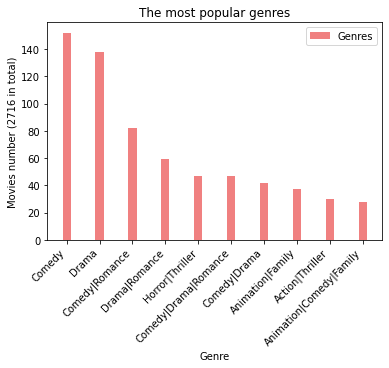

In [206]:
# Creating a visualization
ind = np.arange(len(df_popular_geners))  # the x locations for the groups
width = 0.25       # the width of the bars

# Plot bars, colors, size, x locations, label
geners_bars = plt.bar(ind, df_popular_geners, width, color='lightcoral', label='Genres')
# Use a function to add titles
titles_and_lables('Movies number (2716 in total)','Genre', 'The most popular genres', df_popular_geners.index)
labels = df_popular_geners.index  # xtick labels
plt.xticks(ind, labels, rotation=45, ha="right") 

# legend
plt.legend();

<a id='2'></a>
### 2. Which directors are most popular? Explore TOP-10 most popular directors

> In the bar chart below, we can see ten of the most popular directors. And the different number of the movies made by them from the whole amount of 2716 movies in the group of the most popular.

In [207]:
# TOP-10 most popular directors selection 
# Select the movies with the label 'Very popular', group them by a director, count them, sort them descending order, select first 10
# And save the data frame to the variable df_popular_geners
df_popular_director = df.query('popularity_levels == "Very popular"').groupby('director').id.count().sort_values(ascending=False).head(10)
df_popular_director

director
Steven Spielberg     22
Ron Howard           15
Tim Burton           15
Clint Eastwood       15
Ridley Scott         15
Martin Scorsese      14
Robert Zemeckis      14
Richard Donner       13
Steven Soderbergh    13
Woody Allen          13
Name: id, dtype: int64

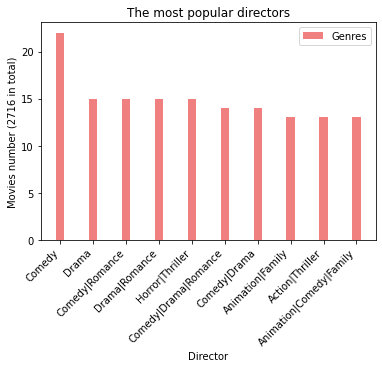

In [208]:
# Creating a visualization
ind = np.arange(len(df_popular_director))  # the x locations for the groups
width = 0.25       # the width of the bars

# Plot bars, colors, size, x locations, label
director_bars = plt.bar(ind, df_popular_director, width, color='lightcoral', label='Genres')
# Use a function to add titles
titles_and_lables('Movies number (2716 in total)', 'Director','The most popular directors', df_popular_director.index) 
plt.xticks(ind, labels, rotation=45, ha="right")
# legend
plt.legend();

<a id='3'></a>
### 3. Explore TOP-10 production companies that made the most popular movies.

> In the bar chart below we can see ten the most popular production companies. And the different number of the movies made by them from the whole amount of 2716 movies in the group of the most popular.

In [209]:
# TOP-10 most popular movies production selection 
# Select the movies with the label 'Very popular', group them by a company, count them, sort them descending order, select first 10
# And save the data frame to the variable df_popular_geners
df_popular_pc = df.query('popularity_levels == "Very popular"').groupby('production_companies').id.count().sort_values(ascending=False).head(10)

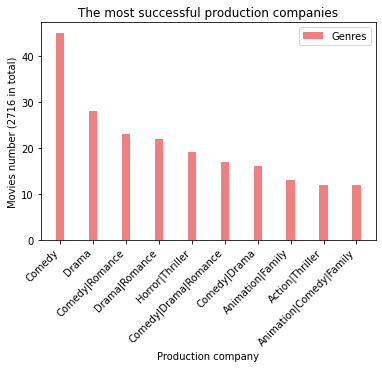

In [210]:
# Creating a visualization

ind = np.arange(len(df_popular_pc))  # the x locations for the groups
width = 0.25       # the width of the bars

# Plot bars, colors, size, x locations, label
pc_bars = plt.bar( ind, df_popular_pc, width, color='lightcoral', label='Genres')
# Use a function to add titles
titles_and_lables('Movies number (2716 in total)', 'Production company', 'The most successful production companies', df_popular_pc.index)
plt.xticks(ind, labels, rotation=45, ha="right")

# legend
plt.legend();

<a id='4'></a>
### 4. Explore how budget and revenue depend on the popularity.

<a id='4a'></a>
#### a. Explore the original budget and revenue without taking into account inflation over time.

In [211]:
# Group all the data by a level of popularity and count a budget each of them
df_budget = df.groupby("popularity_levels").budget.sum()
# Group all the data by a level of popularity and count a budget each of them
df_revenue = df.groupby("popularity_levels").revenue.sum()

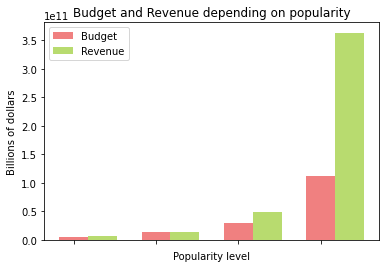

In [212]:
# Creating a visualization

ind = np.arange(len(df_budget))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
budget_bars = plt.bar(ind, df_budget, width, color='lightcoral', label='Budget')
revenue_bars = plt.bar(ind + width, df_revenue, width, color='yellowgreen', alpha=.7, label='Revenue')
locations = ind + width / 2  # xtick locations
labels = ["Very unpopular", "Not popular", "Popular", "Very popular"]  # xtick labels
plt.xticks(locations, labels)
# Use a function to add titles
titles_and_lables('Billions of dollars', 'Popularity level', 'Budget and Revenue depending on popularity','' )
print()
# legend
plt.legend();

> #### So, we can see a strong correlation between the popularity of the film, its budget, and the revenue. The most popular movies have bigger budgets and much bigger revenues. 
> #### At the same time the less popular movies have the smallest production budgets and much smaller revenue.

<a id='4b'></a>
#### b. Explore the original budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [213]:
# Group all the data by a level of popularity and count a budget, accounting for inflation each of them
df_budget_adj = df.groupby("popularity_levels").budget_adj.sum()
# Group all the data by a level of popularity and count a revenue, accounting for inflation each of them
df_revenue_adj = df.groupby("popularity_levels").revenue_adj.sum()


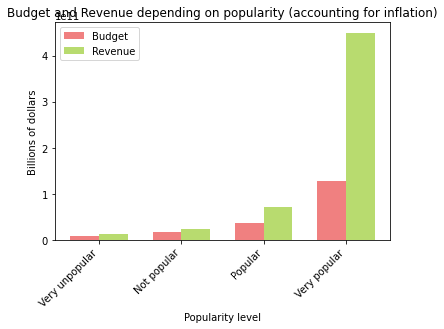

In [214]:
# Creating a visualization

ind = np.arange(len(df_budget))  # the x locations for the groups
# the x locations for the groups

width = 0.35       # the width of the bars

# plot bars
green_bars = plt.bar(ind, df_budget_adj, width, color='lightcoral', label='Budget')
blue_bars = plt.bar(ind + width, df_revenue_adj, width, color='yellowgreen', alpha=.7, label='Revenue')
# Use a function to add titles
titles_and_lables('Billions of dollars', 'Popularity level', 'Budget and Revenue depending on popularity (accounting for inflation)','' )
locations = ind + width / 2  # xtick locations
labels = ["Very unpopular", "Not popular", "Popular", "Very popular"]  # xtick labels
plt.xticks(locations, labels)

print()
# legend
plt.legend();

> #### We can see the more accurate result, but the main conclusion stays the same - The most popular movies have bigger budgets and much bigger revenues. And less popular movies have the smallest production budgets and much smaller revenue.

<a id='5'></a>
### 5. Explore is there a correlation between popularity and the votes

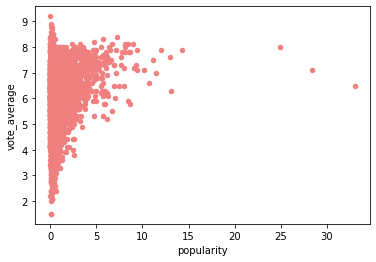

In [215]:
# Creating a visualization (a scatter plot) with popularity and vote_average parameters 
df.plot(x='popularity', y='vote_average', kind='scatter', color='lightcoral');

> It's looks like the popularity is a more complex feature than IMDB votes. Not popular movies have all kinds of average votes when movies with average popularity almost don't have the votes under 5, but they have a wide rating - in most of the cases from 5 to 8.
And the most curious thing is that the highest rating has very unpopular movies. 
So we can´t draw any conclusion based on the movie's rating only, it's necessary to explore it more deeply.

<a id='conclusions'></a>
## Conclusions

> We explored The Movie Database with more than 10000 movies for the period 1960-2015 years. Since this is not a sample, but a complete data set this data is absolutely enough to answer the questions under study. The quality, quantity and characteristics of the data provided are completely sufficient.
>
> **The most popular directors are:** Steven Spielberg, Ron Howard, and Tim Burton 
> <br>For more details: <a href="#1">Which genres are most popular? Explore TOP-10 most popular genres</a></li>
> <br>For more details: <a href="#2">Which directors are most popular? Explore TOP-10 most popular directors</a>
> **The most successful production studios are:** Paramount Pictures, Walt Disney Studios, and Universal Pictures.
> <br>For more details:<a href="#3">Explore TOP-10 production companies that made the most popular movies.</a>
> **The most popular films had much greater production budgets than less popular ones.** At the same time, the revenue of the most popular films is significantly high compared with unpopular movies. 
>
> Also, we found that there is no deep correlation between popularity and a movie's rating.
